# Assignment 1

Note: This notebook file for the assignment has deviations from the course guide with respect to the structure, sentence framing, question framing and numbering. Please consider this notebook file structure as the final structure and follow this.

In this assignment, you will explore the CIFAR10 dataset. 

You have to download the dataset from Pytorch.

Comment your code and indicate what the different instructions are doing and what you are showing and printing. 
When printing figures do not forget about the title, x and y labels. The font size should be matching the text size of the text in your report. 
Do not forget to add legends to the plots. 

------------------------

In [1]:
# Load all the needed packages for this assignment here
import numpy as np
# include packages you will be using
import torchvision
%matplotlib inline
import matplotlib.pyplot as plt

#### Exercise 1.1 - Load data

**a)** Load the CIFAR10 dataset. 

**b)** Print the number of samples and the number of classes present in the dataset. 

**c)** Also print the shape of an image in the dataset. 

In [2]:
# Ex.1.1a,b & c
DATASET_LOCATION = "/Users/hungnguyen/Masters/Data/cifar10"
cifar10_train = torchvision.datasets.CIFAR10(DATASET_LOCATION, train=True, download=False)
cifar10_test = torchvision.datasets.CIFAR10(DATASET_LOCATION, train=False, download=False)

In [3]:
print(cifar10_train.__len__())
print(cifar10_test.__len__())
print(cifar10_train[0][0].size)

50000
10000
(32, 32)


#### Exercise 1.2 - Quantify dataset

**a)** Print the number of samples per category.

In [4]:
# Ex.1.2a your code here
from collections import Counter
samples_per_cat = Counter(cifar10_train.targets)
print(samples_per_cat)

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


**b)** Plot the number of samples per category using a bar plot.

<BarContainer object of 10 artists>

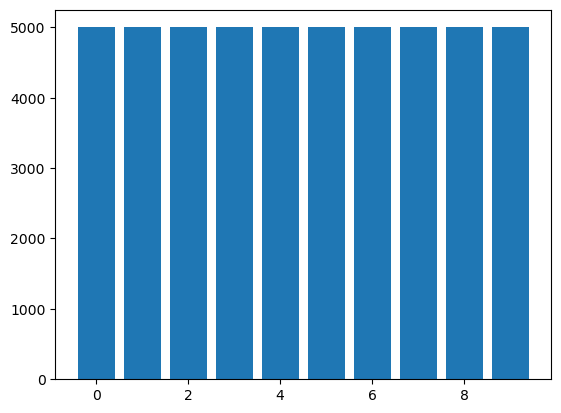

In [5]:
# Ex.1.2b your code here
plt.bar(samples_per_cat.keys(), samples_per_cat.values())

**Reflection: Answer the below question**

Are you working with a balanced or an unbalanced dataset? Are there majoritarian classes? Do you think this will affect the later analysis and training of your models?

> Your Answer (Double click to edit): A very balanced dataset.

#### Exercise 1.3 - Visualize images in your dataset

Create a figure with n x 4 sub-plots. The value of 'n' depends on the number of categories present in the dataset.
As the title of each row in your figure, indicate the category it belongs to.

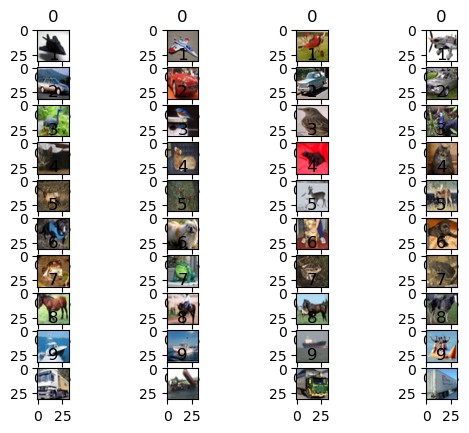

In [6]:
# Ex.1.3 your code here
fig, axs = plt.subplots(10, 4)
for key in sorted(samples_per_cat.keys()):
    i = 0
    x = 0
    while i < 4:
        if cifar10_train[x][1] == key:
            axs[key, i].imshow(cifar10_train[x][0])
            axs[key, i].set_title(cifar10_train[x][1])
            i += 1
        x += 1

#### Exercise 1.4 - RGB feature extraction

Extract RGB values from each image in your dataset as three seperate lists(one per channel). Each list should have 8 values. To do so, you can compute the histogram of each channel with 8 bins. Then you have to concatenate the values of all the three channels together resulting in a feature vector of size 24. This feature vector is the descriptor of an image in your dataset. You will have to do this for all the images present in your dataset in order to get the overall RGB descriptor which will be of size (n,24). Here 'n' depends on the number of samples present in the dataset. 

Text(0, 0.5, 'Pixel count')

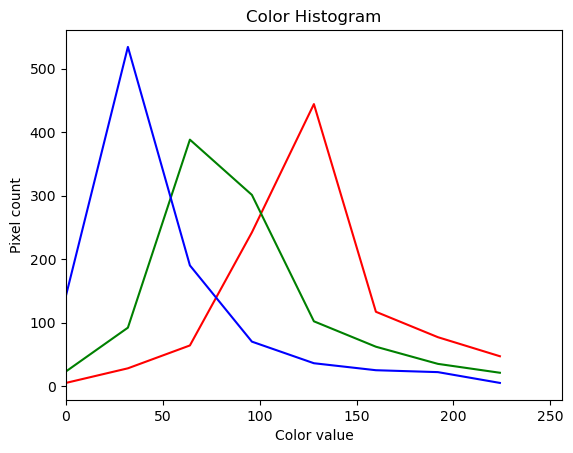

In [7]:
# Ex.1.4 your code here
colors = ("red", "green", "blue")
image = np.array(cifar10_train[0][0])

plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=8, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

In [8]:
cifar_train_array = np.array(cifar10_train, dtype=object)

/var/folders/t7/jg5qdbm57gv0xlsy9nhjgtcw0000gn/T/ipykernel_59163/4290849430.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  cifar_train_array = np.array(cifar10_train, dtype=object)


In [9]:
feature_list = []
for image, label in cifar10_train:
    image_feature = []
    # image_feature_with_label = []
    colors = ("red", "green", "blue")
    image = np.array(image)
    # image_feature_with_label.append(label)
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=8, range=(0, 256)
        )
        image_feature = np.concatenate((image_feature, histogram))
    # print(image_feature)
    image_feature = image_feature / 784
    image_feature = np.append(image_feature,label)
    feature_list.append(image_feature)



print(len(feature_list))



50000


#### Exercise 1.5 - Correlation among samples of the different categories

After extracting the overall RGB descriptor from previous exercise, concatenate the labels(each category represents a label) to it. 

**a)** Compute the intra-class variability of your dataset.

Intra-class correlation aims at understanding the compactness of a class/group/category. This is done basically through the computation of a score of similarity among samples. In this assignment, the purpose of doing intra-class correlation is basically to check the similarity between the samples of each class, so that we would have an idea of how similar the dataset is, for each class.

For this, you can use the implementation from the pingouin package- https://pingouin-stats.org/build/html/generated/pingouin.intraclass_corr.html

Here is an example: https://www.statology.org/intraclass-correlation-coefficient-python/. You are not obliged to follow it. You can implement your own function or another one you may implement.

In [10]:
import pandas as pd



In [11]:
# Ex.1.5a your code here
from pingouin import intraclass_corr
# print(intraclass_corr(features_df, targets= label, rating = column, rater = class_index))


**b)** Compute the inter-class variability of your dataset.

Inter-class correlation aims at understanding the relationship/correlation among the classes/categories present in your dataset. For this, you could compute a measure (for example mean, std etc.) collectively for all the samples belonging to each and every class of the dataset. Then you could make use of this measure to find the correlation among the classes/categories using the standard pandas dataframe correlation function. Link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [12]:
# Ex.1.5b your code here
features_df = pd.DataFrame(feature_list)
features_df = features_df.rename({24: 'label'}, axis='columns')
mean_df = pd.DataFrame()
for i in range(10):
    x = features_df.sort_values(by='label').loc[features_df['label'] == i].mean()
    x = x.iloc[::-1]
    mean_df = pd.concat([mean_df, x.to_frame()], axis=1)

mean_df.columns = mean_df.iloc[0]
mean_df = mean_df[1:]
mean_df.corr()



label,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
label,,,,,,,,,,
0.0,1.000000,0.052321,0.470928,0.139518,0.322096,0.249280,0.123002,0.315648,0.887582,0.337923
1.0,0.052321,1.000000,0.806705,0.916883,0.881101,0.863930,0.931807,0.866904,0.355914,0.890496
2.0,0.470928,0.806705,1.000000,0.916491,0.979866,0.948224,0.907693,0.968539,0.674754,0.835521
3.0,0.139518,0.916883,0.916491,1.000000,0.954946,0.984555,0.981524,0.962153,0.417146,0.837122
4.0,0.322096,0.881101,0.979866,0.954946,1.000000,0.962833,0.959474,0.984896,0.564242,0.876925
5.0,0.249280,0.863930,0.948224,0.984555,0.962833,1.000000,0.952901,0.968334,0.525305,0.806994
6.0,0.123002,0.931807,0.907693,0.981524,0.959474,0.952901,1.000000,0.956356,0.374512,0.859290
7.0,0.315648,0.866904,0.968539,0.962153,0.984896,0.968334,0.956356,1.000000,0.530659,0.894939
8.0,0.887582,0.355914,0.674754,0.417146,0.564242,0.525305,0.374512,0.530659,1.000000,0.504796


**c)** Compute the Silhouette score.

The Silhouette score is used to assess the performance of using unsupervised machine learning (clustering). We can also use it here to assess the compactness of the extracted descriptors per category and for the group of categories as their mean.

You can use the function available in Sklearn - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [13]:
# Ex.1.5c your code here
from sklearn.metrics import silhouette_score
feature_df_without_label = features_df.drop(columns=['label'])
silhouette_score(feature_df_without_label, labels=features_df['label'])

-0.08492854865203084

**Reflection: (Answer the below questions)** 

**1.** Does Intra-class correlation score/coefficient help you assess the degree of similarity among the samples of a category?
> Your Answer (Double click to edit): 

**2.** What can you deduce from the Inter-class correlation and Silhouette score?
> Your Answer (Double click to edit): Silhouette score equals approx. 0, means that there are overlapping between classes.

#### Exercise 1.6 - Dimensionality reduction for visualization 

We can visualize large datasets having higher dimensions or features in 2- or 3-dimensional spaces. For this, you need to reduce the dimensionality of the data. 

In this exercise, you are asked to use PCA for reducing dimensionality.

Link to function to apply PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Create the following two figures:

**a)** Rely on the first 2 principal components to plot the samples of your dataset. Use one color per class.

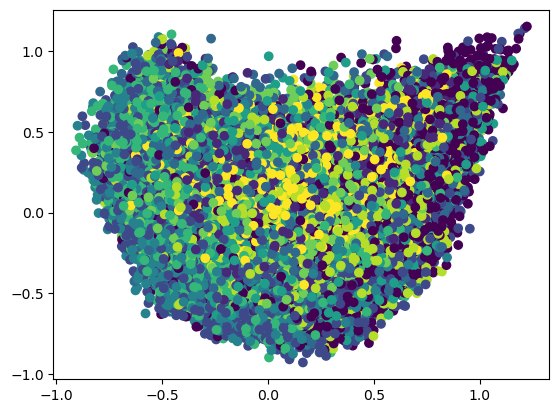

In [72]:
# Ex.1.6a your code here
from sklearn.decomposition import PCA
pca = PCA(n_components=2,)
features_pca_2 = pca.fit_transform(X=features_df.iloc[:, :24], y=features_df.iloc[:, 24])
features_pca_2 = np.column_stack((features_pca_2, features_df.iloc[:, 24].to_numpy().astype(int)))
colors = ['white', 'red', 'green', 'blue', 'yellow', 'darkorchid', 'violet', 'pink', 'crimson', 'darkorange']

plt.scatter(features_pca_2[:,0], features_pca_2[:,1], c=features_pca_2[:,2] )

**b)** Rely on the first 3 principal components to create a 3D plot. Use one color per class.

In [4]:
# Ex.1.6b your code here

#### Exercise 1.7 - Reflection

Reflect on the following questions.

**a)** Will you obtain the same visualisation in the feature space for different extracted features?
> Your Answer (Double click to edit): 
    
**b)** Are the classes distinguishable on the feature space when relying on PCA over RGB?
> Your Answer (Double click to edit): 
    
**c)** What other visualization could you include to better describe your data?
> Your Answer (Double click to edit): 

#### [Optional] Exercise: Repeat experiments with different image descriptors

e.g. 
- Harris Corner Detection

- Shi-Tomasi Corner Detector and Good Features to Track

- Scale-Invariant Feature Transform (SIFT)

- Speeded-up robust features (SURF)

- Features from Accelerated Segment Test (FAST)

- Blob Detectors With LoG, DoG, and DoH

If you have OpenCV installed you can follow this example,
https://automaticaddison.com/image-feature-detection-description-and-matching-in-opencv/

When using Scikit-image,
https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog